In [33]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [34]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [35]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [36]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

15.486314893522348 6.346032463244171
48.53907899875563 114.51218100736173
-37.538752729955846 120.53749738030308
82.29260897795831 36.58378193815264
-20.955224928775934 73.6970148491204
-42.70182103180589 36.996277035454426
43.733332077575255 29.908728503616686
-64.21336153097387 153.68247612639578
5.458227189113245 -47.28025254692784
-68.98706370795422 93.69349020618341
-9.602086559096492 -58.53365859631002
24.776982827124144 -88.84520185470342
70.60886449796976 94.25306931024369
-68.88818545250302 17.553598019635928
79.64284438901046 92.65218245025079
-44.13325439480607 20.273056730317677
-79.54999725340551 -3.7100218709155115
-89.92100184813364 173.4551366818788
-73.21236225358166 132.02354015872953
38.55647990355601 -23.84504037444296
-11.00487301257833 85.27917941714117
-52.726252261292586 3.6582314728268557
41.720417643229865 23.162628247748955
-58.51967504762901 -135.36411157718425
-6.3051821829626675 -113.51403142011968
-16.34449426612305 23.404000699304447
-72.74983279355365 -

In [37]:
from citipy import citipy

In [38]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

592

In [39]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [40]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4ec4355085bfa38109e62b68879759cc


In [41]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [42]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | abalak
Processing Record 2 of Set 1 | nizhniy tsasuchey
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | vardo
Processing Record 5 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 6 of Set 1 | east london
Processing Record 7 of Set 1 | sfantu gheorghe
Processing Record 8 of Set 1 | hobart
Processing Record 9 of Set 1 | saint-georges
Processing Record 10 of Set 1 | busselton
Processing Record 11 of Set 1 | aripuana
Processing Record 12 of Set 1 | dzilam gonzalez
Processing Record 13 of Set 1 | talnakh
Processing Record 14 of Set 1 | bredasdorp
Processing Record 15 of Set 1 | hermanus
Processing Record 16 of Set 1 | bluff
Processing Record 17 of Set 1 | new norfolk
Processing Record 18 of Set 1 | vila franca do campo
Processing Record 19 of Set 1 | hithadhoo
Processing Record 20 of Set 1 | cape town
Processing Record 21 of Set 1 | kresna
Processing

Processing Record 37 of Set 4 | kushmurun
Processing Record 38 of Set 4 | messina
Processing Record 39 of Set 4 | manokwari
Processing Record 40 of Set 4 | kupang
Processing Record 41 of Set 4 | akureyri
Processing Record 42 of Set 4 | fez
Processing Record 43 of Set 4 | kulhudhuffushi
Processing Record 44 of Set 4 | bhairab bazar
Processing Record 45 of Set 4 | pacific grove
Processing Record 46 of Set 4 | puerto narino
Processing Record 47 of Set 4 | tazovskiy
Processing Record 48 of Set 4 | aksarka
Processing Record 49 of Set 4 | taitung
Processing Record 50 of Set 4 | georgetown
Processing Record 1 of Set 5 | bredy
Processing Record 2 of Set 5 | muzhi
Processing Record 3 of Set 5 | castro
Processing Record 4 of Set 5 | sirjan
Processing Record 5 of Set 5 | kruisfontein
Processing Record 6 of Set 5 | werda
Processing Record 7 of Set 5 | tsihombe
City not found. Skipping...
Processing Record 8 of Set 5 | hay river
Processing Record 9 of Set 5 | teluk nibung
Processing Record 10 of Se

Processing Record 25 of Set 8 | phra pradaeng
Processing Record 26 of Set 8 | dawei
Processing Record 27 of Set 8 | tocopilla
Processing Record 28 of Set 8 | washington
Processing Record 29 of Set 8 | angoram
Processing Record 30 of Set 8 | zavodskoy
Processing Record 31 of Set 8 | maniitsoq
Processing Record 32 of Set 8 | vermilion
Processing Record 33 of Set 8 | lagos
Processing Record 34 of Set 8 | gornyak
Processing Record 35 of Set 8 | mount gambier
Processing Record 36 of Set 8 | bontang
Processing Record 37 of Set 8 | semey
Processing Record 38 of Set 8 | poum
Processing Record 39 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 40 of Set 8 | la brea
Processing Record 41 of Set 8 | reims
Processing Record 42 of Set 8 | immokalee
Processing Record 43 of Set 8 | sabang
Processing Record 44 of Set 8 | nishihara
Processing Record 45 of Set 8 | santiago de cao
Processing Record 46 of Set 8 | santiago del estero
Processing Record 47 of Set 8 | umm lajj
Processing Reco

Processing Record 18 of Set 12 | tiznit
Processing Record 19 of Set 12 | marystown
Processing Record 20 of Set 12 | japura
Processing Record 21 of Set 12 | mount isa
Processing Record 22 of Set 12 | touros
Processing Record 23 of Set 12 | guymon
Processing Record 24 of Set 12 | pafos
Processing Record 25 of Set 12 | qena
Processing Record 26 of Set 12 | tanabe
Processing Record 27 of Set 12 | camara de lobos
Processing Record 28 of Set 12 | leningradskiy
Processing Record 29 of Set 12 | pula
Processing Record 30 of Set 12 | viljandi
Processing Record 31 of Set 12 | rio grande
Processing Record 32 of Set 12 | mayor pablo lagerenza
Processing Record 33 of Set 12 | eyl
Processing Record 34 of Set 12 | bocas del toro
Processing Record 35 of Set 12 | kinlochleven
Processing Record 36 of Set 12 | kavaratti
Processing Record 37 of Set 12 | bac can
City not found. Skipping...
Processing Record 38 of Set 12 | teignmouth
Processing Record 39 of Set 12 | lakselv
Processing Record 40 of Set 12 | h

In [43]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Abalak,58.1286,68.5944,30.16,96,100,6.89,RU,2022-11-13 02:03:43
1,Nizhniy Tsasuchey,50.5167,115.1333,20.52,67,10,3.02,RU,2022-11-13 02:03:44
2,Albany,42.6001,-73.9662,50.40,75,97,6.53,US,2022-11-13 02:03:44
3,Vardo,70.3705,31.1107,39.18,65,100,9.22,NO,2022-11-13 02:03:44
4,East London,-33.0153,27.9116,66.49,75,100,20.09,ZA,2022-11-13 02:00:33
5,Sfantu Gheorghe,45.8667,25.7833,37.51,88,22,0.65,RO,2022-11-13 02:03:05
6,Hobart,-42.8794,147.3294,55.26,87,75,5.75,AU,2022-11-13 02:00:22
7,Saint-Georges,12.0564,-61.7485,78.69,86,60,7.90,GD,2022-11-13 02:00:30
8,Busselton,-33.6500,115.3333,63.19,40,4,8.08,AU,2022-11-13 02:03:45
9,Aripuana,-9.1667,-60.6333,77.02,66,36,2.08,BR,2022-11-13 02:03:46


In [44]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Abalak,RU,2022-11-13 02:03:43,58.1286,68.5944,30.16,96,100,6.89
1,Nizhniy Tsasuchey,RU,2022-11-13 02:03:44,50.5167,115.1333,20.52,67,10,3.02
2,Albany,US,2022-11-13 02:03:44,42.6001,-73.9662,50.40,75,97,6.53
3,Vardo,NO,2022-11-13 02:03:44,70.3705,31.1107,39.18,65,100,9.22
4,East London,ZA,2022-11-13 02:00:33,-33.0153,27.9116,66.49,75,100,20.09
5,Sfantu Gheorghe,RO,2022-11-13 02:03:05,45.8667,25.7833,37.51,88,22,0.65
6,Hobart,AU,2022-11-13 02:00:22,-42.8794,147.3294,55.26,87,75,5.75
7,Saint-Georges,GD,2022-11-13 02:00:30,12.0564,-61.7485,78.69,86,60,7.90
8,Busselton,AU,2022-11-13 02:03:45,-33.6500,115.3333,63.19,40,4,8.08
9,Aripuana,BR,2022-11-13 02:03:46,-9.1667,-60.6333,77.02,66,36,2.08


In [45]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [48]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [49]:
# Import the time module.
import time

# Get today's date in seconds.
today = time.time()
today

1668306247.4511855

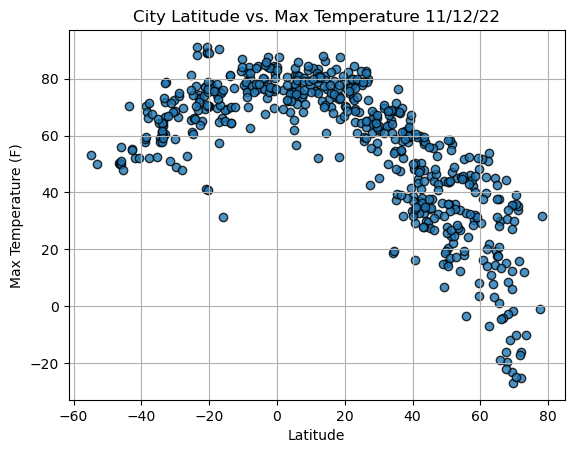

In [50]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

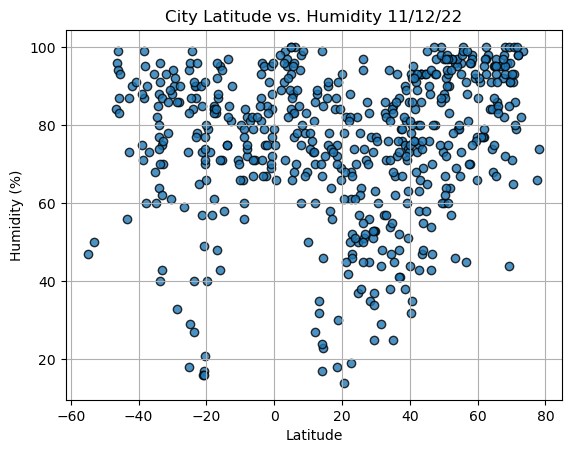

In [51]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

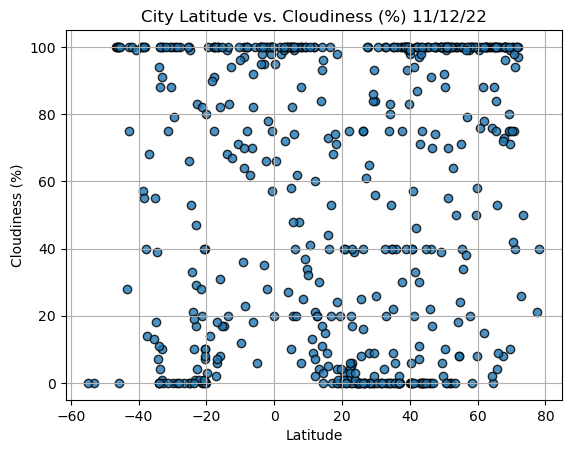

In [52]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

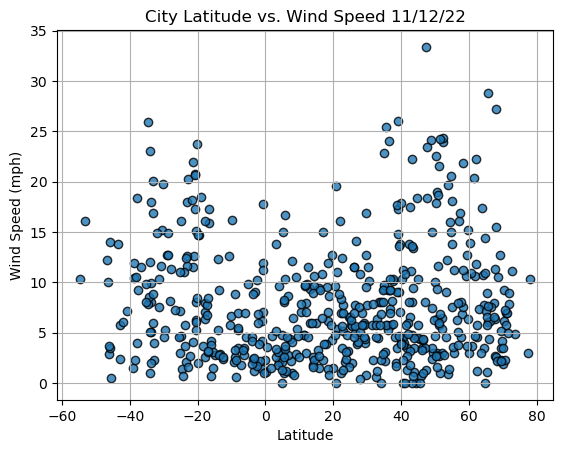

In [53]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()